In [1]:
import sys

sys.path.append("..")

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# local module
import src.utils_torch as utils_torch

In [2]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# prepare_train
foo = SimpleModel()

optimizer = torch.optim.Adam(
    foo.parameters(),
    lr=1000,  # use a significant number
    betas=(0.9, 0.999),
    weight_decay=0.
)

---
cosine mode in learning-rate scheduler

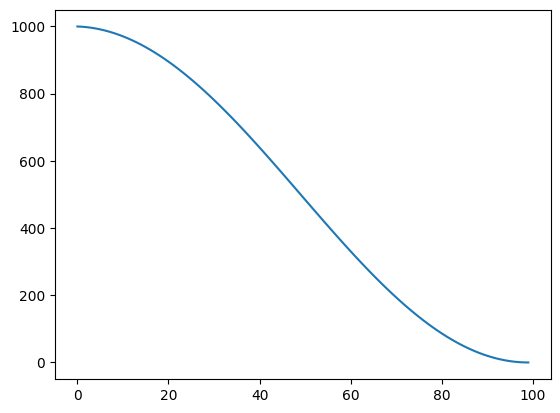

In [3]:
# without warmup

warmup_epoch = 0
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode='cosine', start_scale=0.0)

lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates)

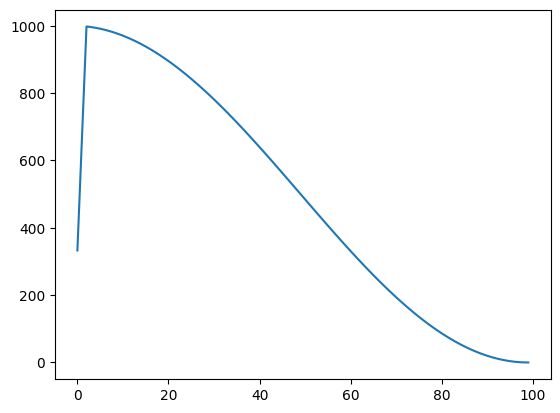

In [4]:
# with warmup

warmup_epoch = 3
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode='cosine', start_scale=0.0)

lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates)

---
linear mode in learning-rate scheduler

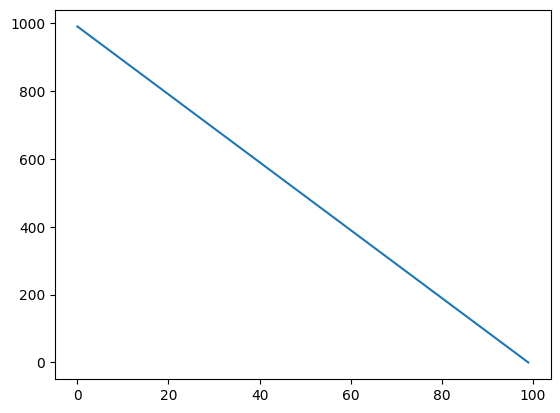

In [5]:
# without warmup

warmup_epoch = 0
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode='linear', start_scale=0.0)

lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates)

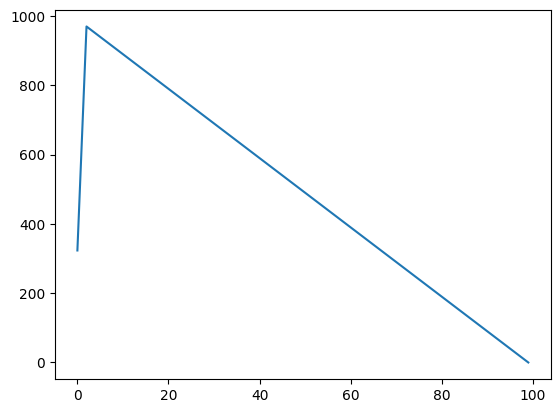

In [6]:
# with warmup

warmup_epoch = 3
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode='linear', start_scale=0.0)

lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates)

---
exponential mode in learning-rate scheduler

([<matplotlib.lines.Line2D at 0x7d58ca121f10>], 9.999999999999994e-05)

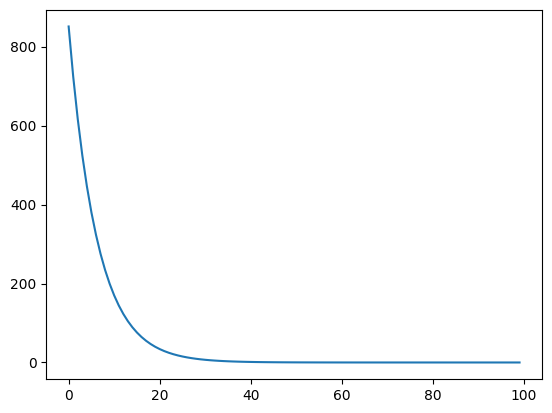

In [7]:
# without warmup

warmup_epoch = 0
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode='exp', start_scale=0.0)


lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates), lr_rates[-1]

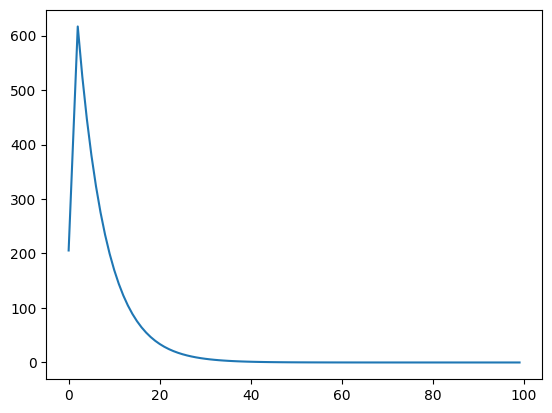

In [8]:
# with warmup

warmup_epoch = 3
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode='exp', start_scale=0.0)

lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates)

---
none mode in learning-rate scheduler

([<matplotlib.lines.Line2D at 0x7d58ca014700>], 1000)

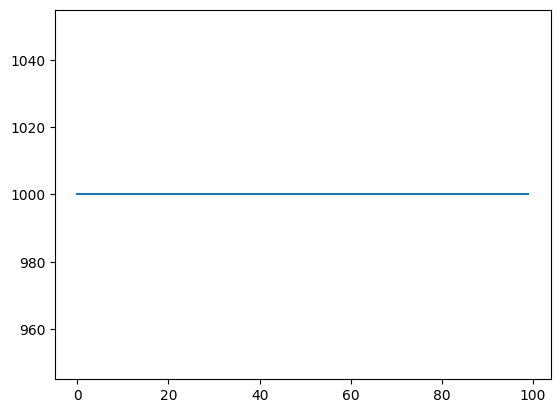

In [9]:
# without warmup

warmup_epoch = 0
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode=None, start_scale=0.0)


lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates), lr_rates[-1]

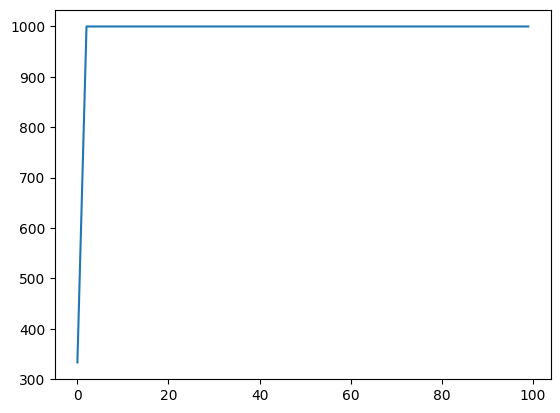

In [10]:
# with warmup

warmup_epoch = 3
total_epoch = 100

lr_scheduler = utils_torch.CustomizedLRScheduler(
    optimizer, warmup_epoch=warmup_epoch, total_epoch=total_epoch,
    final_scale=0.0, mode=None, start_scale=0.0)

lr_rates = []
for _ in range(total_epoch):
    lr_scheduler.step()
    lr_rates.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_rates)